
# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

	
About Dataset
Context
A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?
If this help you studying or working, please don´t forget to upvote :). Reference to Joni Hoppen and Aquarela Advanced Analytics Aquarela

Greetings!

Content
110527 medical appointments its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment. Variable names are self-explanatory, if you have doubts, just let me know!

scholarship variable means this concept = https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

14 variables

Data Dictionary
* 01 - PatientId
Identification of a patient
* 02 - AppointmentID
Identification of each appointment
* 03 - Gender
Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
* 04 - DataMarcacaoConsulta
The day of the actuall appointment, when they have to visit the doctor.
* 05 - DataAgendamento
The day someone called or registered the appointment, this is before appointment of course.
* 06 - Age
How old is the patient.
* 07 - Neighbourhood
Where the appointment takes place.
* 08 - Scholarship
True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
* 09 - Hipertension
True or False
* 10 - Diabetes
True or False
* Alcoholism
True or False
* Handcap
True or False
* SMS_received
1 or more messages sent to the patient.
* No-show
True or False.

## Questions Asked
* How many Group of gender show-up and does not show-up for the appoinment
* Did people that have disease show-up more than does that did not have
* the people that showed-up is it some features maybe scholarship or many more
* which neighbourhood was occured most


In [3]:
# importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd drive

/content/drive


In [6]:
ls

MyDrive/


In [7]:
cd MyDrive

/content/drive/MyDrive


In [8]:
ls

'2nd semester'/       'Colab Notebooks'/                          pdf/
'CLASSIC MODEL  DB'/   noshowappointments-kagglev2-may-2016.csv   udacity/


# Introduction
## Data Wrangling Phase
### Dataset Description 

In [9]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [11]:
# renaming the columns
df.rename(columns = 
          {'PatientId':'Patient_Id','AppointmentID':'Appointment_ID','ScheduledDay':'Scheduled_Day',
           'AppointmentDay':'Appointment_Day','No-show':'No_show'}, inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Patient_Id       110527 non-null  float64
 1   Appointment_ID   110527 non-null  int64  
 2   Gender           110527 non-null  object 
 3   Scheduled_Day    110527 non-null  object 
 4   Appointment_Day  110527 non-null  object 
 5   Age              110527 non-null  int64  
 6   Neighbourhood    110527 non-null  object 
 7   Scholarship      110527 non-null  int64  
 8   Hipertension     110527 non-null  int64  
 9   Diabetes         110527 non-null  int64  
 10  Alcoholism       110527 non-null  int64  
 11  Handcap          110527 non-null  int64  
 12  SMS_received     110527 non-null  int64  
 13  No_show          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [13]:
df['Scheduled_Day'] = df['Scheduled_Day'].apply(np.datetime64) 
df['Appointment_Day'] = df['Appointment_Day'].apply(np.datetime64)

In [14]:
#display(df['ScheduledDay'].dt.year.unique(),
#df['AppointmentDay'].dt.year.unique())

In [15]:
# checking for missing values in the datasets
display(df.isnull().sum(), 
        df.isna().sum())

Patient_Id         0
Appointment_ID     0
Gender             0
Scheduled_Day      0
Appointment_Day    0
Age                0
Neighbourhood      0
Scholarship        0
Hipertension       0
Diabetes           0
Alcoholism         0
Handcap            0
SMS_received       0
No_show            0
dtype: int64

Patient_Id         0
Appointment_ID     0
Gender             0
Scheduled_Day      0
Appointment_Day    0
Age                0
Neighbourhood      0
Scholarship        0
Hipertension       0
Diabetes           0
Alcoholism         0
Handcap            0
SMS_received       0
No_show            0
dtype: int64

In [16]:
df.shape

(110527, 14)

Here we can see that from our documentation we see that the dataset is complete where we have 110527 rows and 14 rows

In [17]:
df.nunique()

Patient_Id          62299
Appointment_ID     110527
Gender                  2
Scheduled_Day      103549
Appointment_Day        27
Age                   104
Neighbourhood          81
Scholarship             2
Hipertension            2
Diabetes                2
Alcoholism              2
Handcap                 5
SMS_received            2
No_show                 2
dtype: int64

information we gather is that looking at the 
1. patientid their are some patient that make appointedment several time that is the reason why it is not up to the total number
2. for the appointmentDay we only have 27 unique number of appointment days
3. Scholarship            2(True or false)
4. Hipertension           2(True or false)
5. Diabetes               2(True or false)
6. Alcoholism             2(True or false)
7. Handcap                5 this ought to be (True or false) but i am going to look on that
8. SMS_received           2(True or false)
9. No-show 

In [18]:
# show a descriptive statistics of the data 'df'
df.describe()

,Patient_Id,Appointment_ID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Here we notice that the age has a min of -1 and which is not possible for a person to have a negative age

In [19]:
df.rename(columns= {'Hipertension': 'hypertension', 'Handcap': 'handicap'}, inplace= True)

* 1.ScheduledDay and AppointmentDay are strings not datetime64 but now have being change to datatime
* 2.PatientId is way less than AppointmentId: meaning patient may revisit several times
* 3.renamed some columns with typos error such as (Hipertension, Handcap) 
* 4.Handcap values are (0, 1, 2, 3, 4) stands for different levels of being a Handicap
* 6.AppointmentDay does not show the exact time, only the date
* 7.Null values does not exists in this dataset

In [20]:
df.head()

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,hypertension,Diabetes,Alcoholism,handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [21]:
df.columns

Index(['Patient_Id', 'Appointment_ID', 'Gender', 'Scheduled_Day',
       'Appointment_Day', 'Age', 'Neighbourhood', 'Scholarship',
       'hypertension', 'Diabetes', 'Alcoholism', 'handicap', 'SMS_received',
       'No_show'],
      dtype='object')

In [22]:
print('Gender', df.Gender.unique())
print('Scholarship', df.Scholarship.unique())
print('hypertension', df.hypertension.unique())
print('Diabetes', df.Diabetes.unique())
print('Alcoholic', df.Alcoholism.unique())
print('Handicap', df.handicap.unique())
print('SMS recieved', df.SMS_received.unique())
print('No Show', df['No_show'].unique())
print('Appointment Day', df.No_show.unique())
print('Age', df.Age.unique())

Gender ['F' 'M']
Scholarship [0 1]
hypertension [1 0]
Diabetes [0 1]
Alcoholic [0 1]
Handicap [0 1 2 3 4]
SMS recieved [0 1]
No Show ['No' 'Yes']
Appointment Day ['No' 'Yes']
Age [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


I notice that their is a negative age in the dataset which is not visible for paltient to have and i also limit the age to 100
so this analysis is base on age of people from 0-100

In [23]:
df = df[(df['Age'] >-1) & (df['Age'] <=100)]
df.describe()

,Patient_Id,Appointment_ID,Age,Scholarship,hypertension,Diabetes,Alcoholism,handicap,SMS_received
count,1.105190e+05,1.105190e+05,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000
mean,1.474860e+14,5.675303e+06,37.084519,0.098273,0.197251,0.071870,0.030402,0.022213,0.321040
std,2.560826e+14,7.129600e+04,23.103165,0.297684,0.397925,0.258274,0.171692,0.161441,0.466878
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172598e+13,5.680569e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725522e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,100.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the descriptions it was told that the Handicap feature aought to be true or false but in our dataset it is more than that so i will be removing that.

In [24]:
df  = df[(df['handicap'] <2) ]
df.describe()

,Patient_Id,Appointment_ID,Age,Scholarship,hypertension,Diabetes,Alcoholism,handicap,SMS_received
count,1.103200e+05,1.103200e+05,110320.000000,110320.000000,110320.000000,110320.000000,110320.000000,110320.000000,110320.000000
mean,1.475170e+14,5.675297e+06,37.066044,0.098287,0.196836,0.071610,0.030384,0.018474,0.321193
std,2.561271e+14,7.129939e+04,23.091170,0.297703,0.397609,0.257842,0.171643,0.134657,0.466937
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.174318e+12,5.640276e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.174698e+13,5.680566e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,5.725508e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
df.shape

(110320, 14)

After removing the anomalies from the data we now have 110320 rows and 14 columns

NOTICE:
    Before going into Exploratory Data analysis in our No_Show for the appionment 
   * NO- patient showed-up for their appiontment
   * YES- patient that do not showed-up for their appiontment

In [26]:
# changing the values of the columns NO_show  to a more understandable meaning
df['No_show'].replace(['No','Yes'],['Showed_up','NShowed_up'], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [27]:
df['No_show'].value_counts()

Showed_up     88045
NShowed_up    22275
Name: No_show, dtype: int64

## Exploratory Data Analysis


In [28]:
# NO- patient showed-up for their appiontment, YES- patient that do not showed-up for their appiontment based on Gender
df.groupby('No_show').count()

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,hypertension,Diabetes,Alcoholism,handicap,SMS_received
No_show,,,,,,,,,,,,,
NShowed_up,22275,22275,22275,22275,22275,22275,22275,22275,22275,22275,22275,22275,22275
Showed_up,88045,88045,88045,88045,88045,88045,88045,88045,88045,88045,88045,88045,88045


In [29]:
# we want to see the ratio of male to female
df['Gender'].value_counts()

F    71723
M    38597
Name: Gender, dtype: int64

In [30]:
# which ratio of male to female book more appointment
df.groupby('Gender').count()

,Patient_Id,Appointment_ID,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,hypertension,Diabetes,Alcoholism,handicap,SMS_received,No_show
Gender,,,,,,,,,,,,,
F,71723,71723,71723,71723,71723,71723,71723,71723,71723,71723,71723,71723,71723
M,38597,38597,38597,38597,38597,38597,38597,38597,38597,38597,38597,38597,38597


Here we see that more male book more appointment than female in our datasets

In [31]:
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  86,
        91,  98,  92,  94,  96,  93,  95,  97, 100,  99])

In [32]:
# for further analysis i was able to group the names into different groups
df['age_groups'] = pd.cut(df['Age'], bins=[0, 12, 18, 59, np.inf], labels=['child', 'Adolescence', 'Adult', 'Senior Adult'])

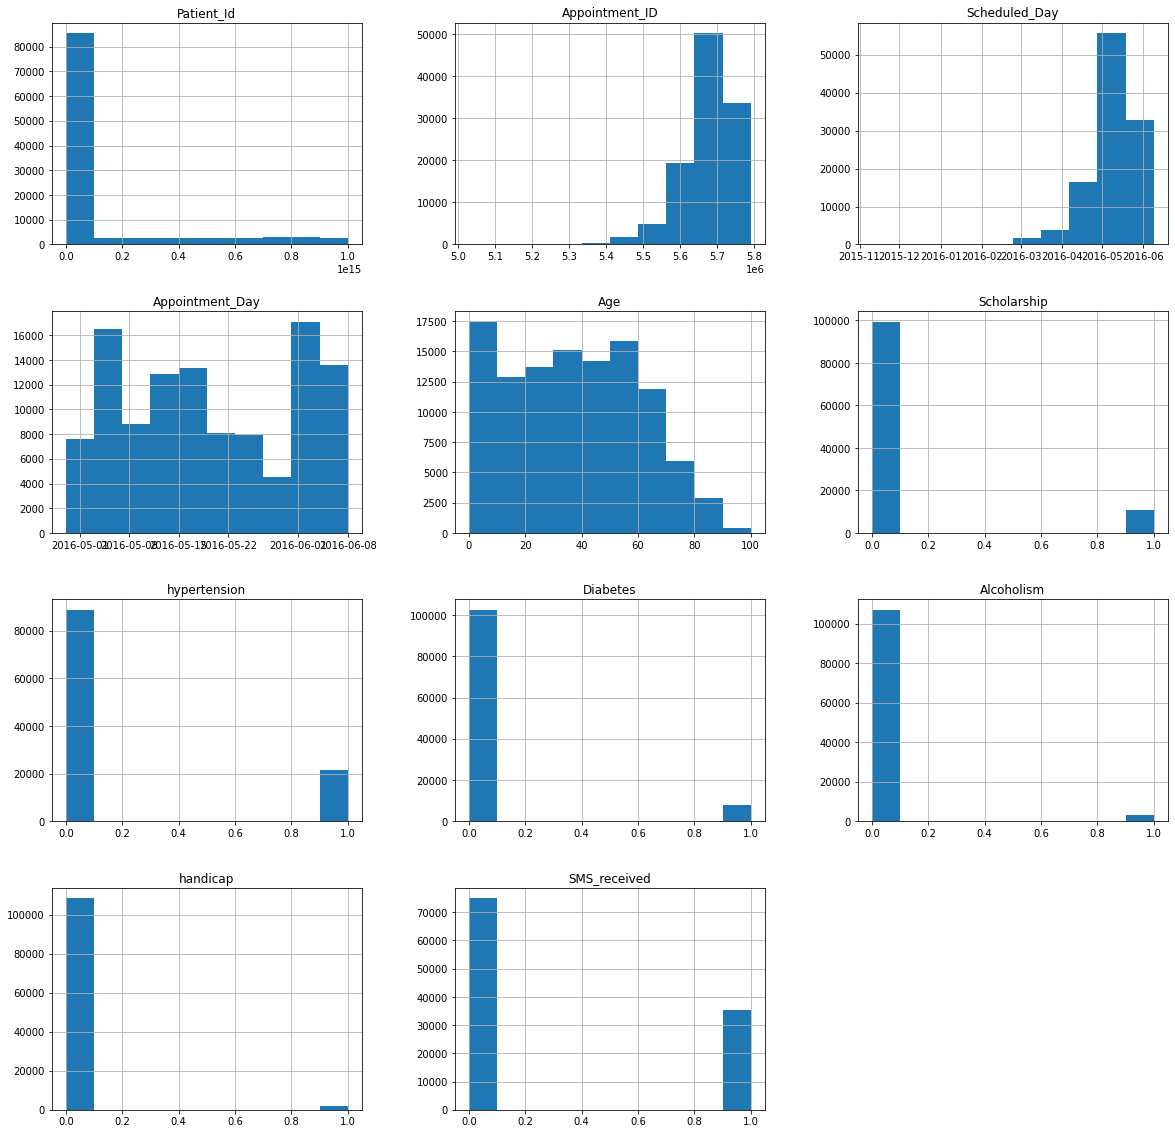

In [33]:
# the distribution of the datas in d
df.hist(figsize = (20,20));

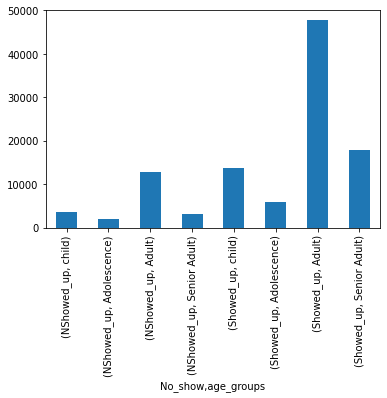

In [34]:
df.groupby(['No_show', 'age_groups'])['Alcoholism'].count().plot(kind = "bar");

grouping ['Alcoholism']  by 'No_show', 'age_groups'  we can see that more of the adults showed-up followed by the Senior Adult,children and the Adolescence came last

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


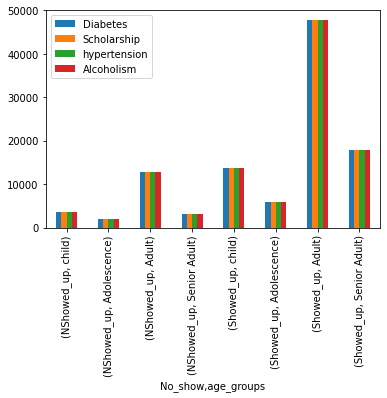

In [35]:
df.groupby(['No_show', 'age_groups'])['Diabetes','Scholarship','hypertension','Alcoholism'].count().plot(kind = "bar");
plt.legend();

grouping 'Diabetes','Scholarship','hypertension','Alcoholism by 'No_show', 'age_groups'  we see that considering other factors i.e the 'Diabetes','Scholarship','hypertension','Alcoholism' we can see that the Adult showed up

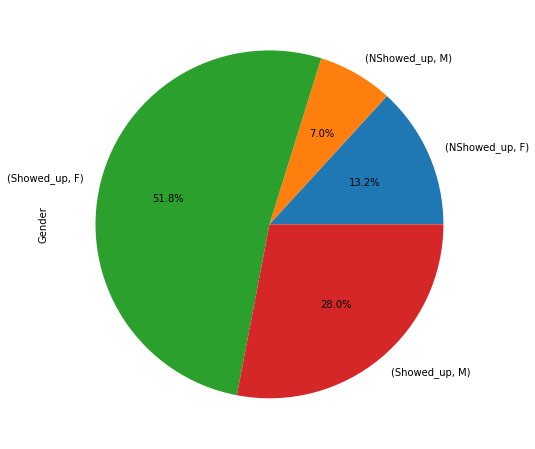

In [36]:
df.groupby('No_show')['Gender'].value_counts().plot(kind = 'pie',autopct='%1.1f%%', figsize = (8,8));

grouping ['Gender'] by 'No_show' Considering the ratio of male to female we can see that we have more female from both the patient that showed_up for their appointment and those that did not

In [37]:
df.columns

Index(['Patient_Id', 'Appointment_ID', 'Gender', 'Scheduled_Day',
       'Appointment_Day', 'Age', 'Neighbourhood', 'Scholarship',
       'hypertension', 'Diabetes', 'Alcoholism', 'handicap', 'SMS_received',
       'No_show', 'age_groups'],
      dtype='object')

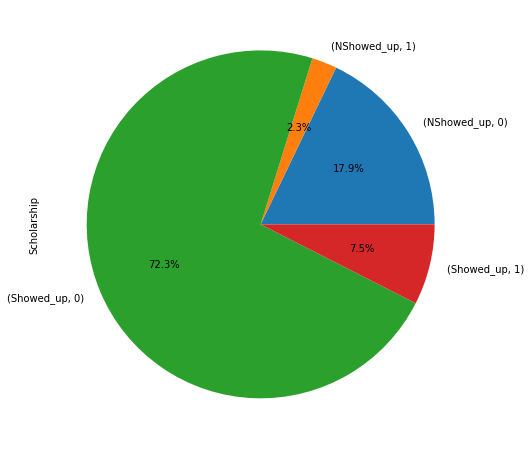

In [38]:
df.groupby('No_show')['Scholarship'].value_counts().plot(kind = 'pie',autopct='%1.1f%%', figsize = (8,8));

In [39]:
df.groupby('No_show')['age_groups'].value_counts()

No_show                 
NShowed_up  Adult           12715
            child            3663
            Senior Adult     3220
            Adolescence      2038
Showed_up   Adult           47692
            Senior Adult    17874
            child           13812
            Adolescence      5767
Name: age_groups, dtype: int64

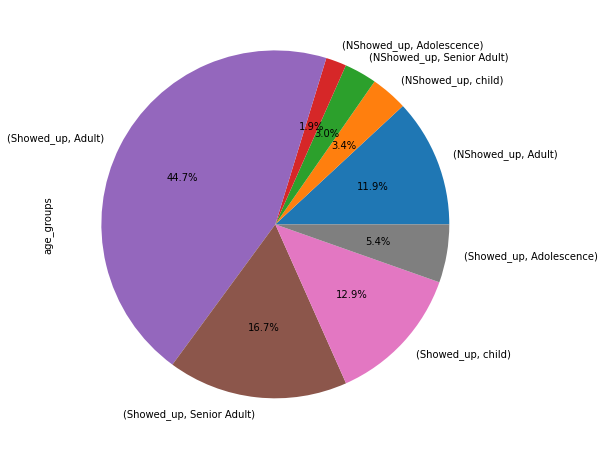

In [40]:
df.groupby('No_show')['age_groups'].value_counts().plot(kind = 'pie',autopct='%1.1f%%', figsize = (8,8));

In [41]:
df.groupby('No_show')['SMS_received'].value_counts()


No_show     SMS_received
NShowed_up  0               12500
            1                9775
Showed_up   0               62386
            1               25659
Name: SMS_received, dtype: int64

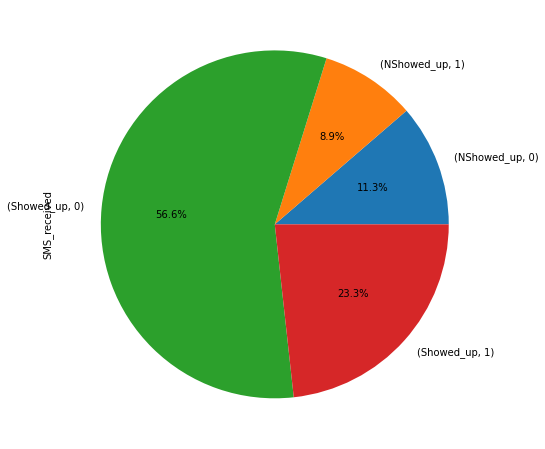

In [42]:
df.groupby('No_show')['SMS_received'].value_counts().plot(kind = 'pie',autopct='%1.1f%%', figsize = (8,8));

we can see from here that most of those people that did not recieve message have more values than those that receive so part of what course people for not showing for their appointment was becuse they did not receive SMS

In [43]:
df['age_groups'].value_counts()

Adult           60407
Senior Adult    21094
child           17475
Adolescence      7805
Name: age_groups, dtype: int64

In [44]:
#finding the values that corrolate together that is the realtionship between them
df.corr()

,Patient_Id,Appointment_ID,Age,Scholarship,hypertension,Diabetes,Alcoholism,handicap,SMS_received
Patient_Id,1.000000,0.003903,-0.004269,-0.002693,-0.006555,0.001729,0.011061,-0.008067,-0.009886
Appointment_ID,0.003903,1.000000,-0.019272,0.022754,0.012770,0.022779,0.033118,0.015186,-0.256880
Age,-0.004269,-0.019272,1.000000,-0.092082,0.503879,0.291914,0.095754,0.081176,0.012853
Scholarship,-0.002693,0.022754,-0.092082,1.000000,-0.019244,-0.024618,0.035220,-0.009115,0.001194
hypertension,-0.006555,0.012770,0.503879,-0.019244,1.000000,0.432273,0.088087,0.081578,-0.006284
Diabetes,0.001729,0.022779,0.291914,-0.024618,0.432273,1.000000,0.018631,0.054842,-0.014789
Alcoholism,0.011061,0.033118,0.095754,0.035220,0.088087,0.018631,1.000000,0.003168,-0.026085
handicap,-0.008067,0.015186,0.081176,-0.009115,0.081578,0.054842,0.003168,1.000000,-0.023873
SMS_received,-0.009886,-0.256880,0.012853,0.001194,-0.006284,-0.014789,-0.026085,-0.023873,1.000000


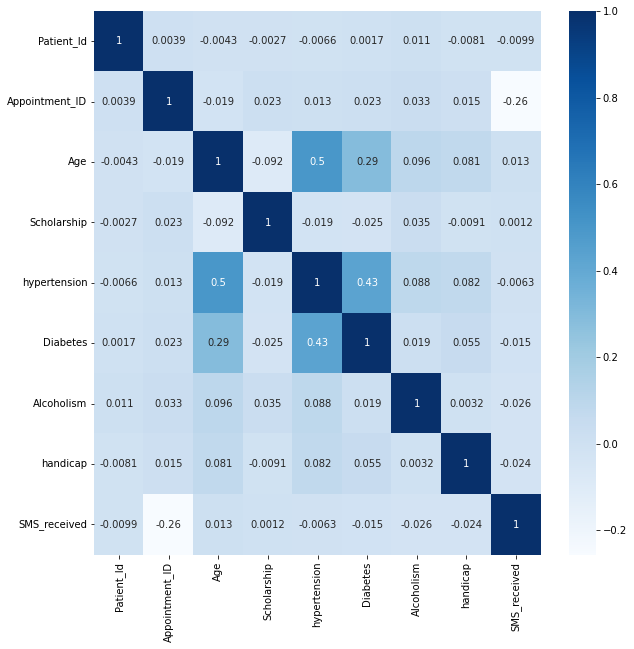

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

Here we can see that age, hypertension have a relationship and Hypertension and Diabetes have a relationship though its not a strong one

In [46]:
df.columns

Index(['Patient_Id', 'Appointment_ID', 'Gender', 'Scheduled_Day',
       'Appointment_Day', 'Age', 'Neighbourhood', 'Scholarship',
       'hypertension', 'Diabetes', 'Alcoholism', 'handicap', 'SMS_received',
       'No_show', 'age_groups'],
      dtype='object')

In [47]:
df.groupby('No_show')['Scholarship'].value_counts()

No_show     Scholarship
NShowed_up  0              19698
            1               2577
Showed_up   0              79779
            1               8266
Name: Scholarship, dtype: int64

In [48]:
df.head(30)

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,hypertension,Diabetes,Alcoholism,handicap,SMS_received,No_show,age_groups
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Showed_up,Senior Adult
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Showed_up,Adult
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Showed_up,Senior Adult
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Showed_up,child
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Showed_up,Adult
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,Showed_up,Senior Adult
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,NShowed_up,Adult
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,NShowed_up,Adult
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,Showed_up,Adult
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,Showed_up,Adult


In [49]:
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5804
RESISTÊNCIA                    4420
JARDIM DA PENHA                3872
ITARARÉ                        3507
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

Here we can see that the mostoccuring location where the appointment wsas taking is in the JARDIM CAMBURI 

In [50]:
df['Scheduled_Day'].dt.year.unique()

array([2016, 2015])

In [51]:
df['Scheduled_Day'].dt.month.unique()

array([ 4,  3,  2,  1,  5, 11, 12,  6])

In [52]:
df['Scheduled_Day'][7].day_name()

'Wednesday'

In [53]:
df.columns

Index(['Patient_Id', 'Appointment_ID', 'Gender', 'Scheduled_Day',
       'Appointment_Day', 'Age', 'Neighbourhood', 'Scholarship',
       'hypertension', 'Diabetes', 'Alcoholism', 'handicap', 'SMS_received',
       'No_show', 'age_groups'],
      dtype='object')

In [55]:
df['No_show'].unique()

array(['Showed_up', 'NShowed_up'], dtype=object)

In [56]:
#calculating the percentage of patient
proportion_no_show = df["No_show"].value_counts() / sum(df["No_show"].value_counts())

print("The percentage of patients that showed up for the appointment is about {}%."
      .format(round(proportion_no_show["Showed_up"],4)*100))

The percentage of patients that showed up for the appointment is about 79.81%.


In [57]:
print("The percentage of patients that did not showed up for the appointment is about {}%."
      .format(round(proportion_no_show["NShowed_up"],4)*100))

The percentage of patients that did not showed up for the appointment is about 20.19%.


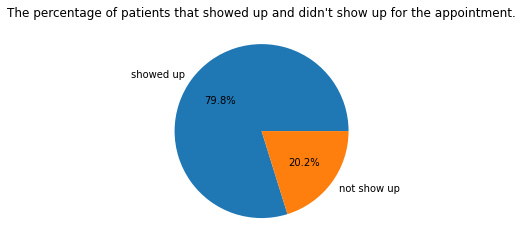

In [58]:
plt.pie(proportion_no_show, labels=["showed up", "not show up"],autopct='%1.1f%%')
plt.title("The percentage of patients that showed up and didn't show up for the appointment.");

In [ ]:
df.columns

In [59]:
## Creating a new column (attribute) containing just the scheduling time:
df['Schedule_Time'] = df.Scheduled_Day.dt.time
## Normalizing the "Day" columns to keep just the date information (dropping the time info)
df['Scheduled_Day'] = df.Scheduled_Day.dt.normalize()

In [60]:
df.head()

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,hypertension,Diabetes,Alcoholism,handicap,SMS_received,No_show,age_groups,Schedule_Time
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Showed_up,Senior Adult,18:38:08
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Showed_up,Adult,16:08:27
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Showed_up,Senior Adult,16:19:04
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Showed_up,child,17:29:31
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Showed_up,Adult,16:07:23


In [61]:
## i will be creating a the waiting day from the subtraction of both 'AppointmentDay' and 'ScheduledDay' since they are also pandas.Timestamp type, this operation can be done directly:
df['Waiting_Days'] = df['Appointment_Day'] - df['Scheduled_Day']

Here we see that some of the waiting days has negative value and which is abnormal and from what that tell us is that some people book for an appointment after the scheduled and this should be treated.

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110320 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   Patient_Id       110320 non-null  float64        
 1   Appointment_ID   110320 non-null  int64          
 2   Gender           110320 non-null  object         
 3   Scheduled_Day    110320 non-null  datetime64[ns] 
 4   Appointment_Day  110320 non-null  datetime64[ns] 
 5   Age              110320 non-null  int64          
 6   Neighbourhood    110320 non-null  object         
 7   Scholarship      110320 non-null  int64          
 8   hypertension     110320 non-null  int64          
 9   Diabetes         110320 non-null  int64          
 10  Alcoholism       110320 non-null  int64          
 11  handicap         110320 non-null  int64          
 12  SMS_received     110320 non-null  int64          
 13  No_show          110320 non-null  object         
 14  age_

In [64]:
df


,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,hypertension,Diabetes,Alcoholism,handicap,SMS_received,No_show,age_groups,Schedule_Time,Waiting_Days
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Showed_up,Senior Adult,18:38:08,0 days
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Showed_up,Adult,16:08:27,0 days
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Showed_up,Senior Adult,16:19:04,0 days
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Showed_up,child,17:29:31,0 days
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Showed_up,Adult,16:07:23,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,Showed_up,Adult,09:15:35,35 days
110523,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,Showed_up,Adult,07:27:33,35 days
110524,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,Showed_up,Adult,16:03:52,41 days
110525,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,Showed_up,Adult,15:09:23,41 days


In [65]:
df['Waiting_Days']

0         0 days
1         0 days
2         0 days
3         0 days
4         0 days
           ...  
110522   35 days
110523   35 days
110524   41 days
110525   41 days
110526   41 days
Name: Waiting_Days, Length: 110320, dtype: timedelta64[ns]

In [66]:
df['Waiting_Days'] = df.Waiting_Days.dt.days 

In [67]:
df['GWaiting_Days'] = pd.cut(df['Waiting_Days'], bins=[-1,0,3,7,15,30,90,180, 10000], labels=['Same day: 0', 'Short: 1-3', 'Week: 4-7', 'Fortnight: 8-15', 'Month: 16-30', 'Quarter: 31-90', 'Semester: 91-180', 'Very long: >180'])

In [69]:
df

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,hypertension,Diabetes,Alcoholism,handicap,SMS_received,No_show,age_groups,Schedule_Time,Waiting_Days,GWaiting_Days
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Showed_up,Senior Adult,18:38:08,0,Same day: 0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Showed_up,Adult,16:08:27,0,Same day: 0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Showed_up,Senior Adult,16:19:04,0,Same day: 0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Showed_up,child,17:29:31,0,Same day: 0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Showed_up,Adult,16:07:23,0,Same day: 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,Showed_up,Adult,09:15:35,35,Quarter: 31-90
110523,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,Showed_up,Adult,07:27:33,35,Quarter: 31-90
110524,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,Showed_up,Adult,16:03:52,41,Quarter: 31-90
110525,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,Showed_up,Adult,15:09:23,41,Quarter: 31-90


In [78]:
df.groupby('No_show')['Waiting_Days'].mean()

No_show
NShowed_up    15.830932
Showed_up      8.759191
Name: Waiting_Days, dtype: float64

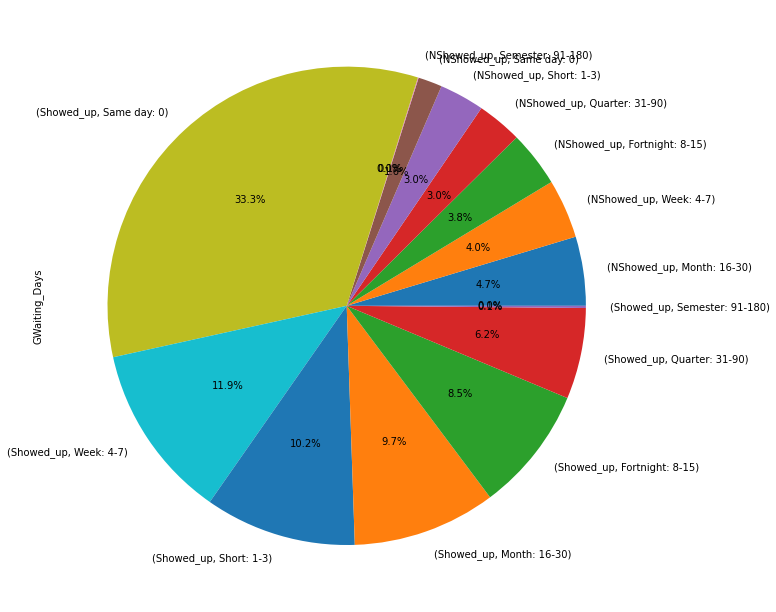

In [76]:
df.groupby('No_show')['GWaiting_Days'].value_counts().plot(kind = 'pie',autopct='%1.1f%%', figsize = (11,11));

# Conclusions:
## The data of medical appointment show or noshow was used to answer a number of questions.
## I was able to explore the data set to understand all its features and we went further to wrangle and clean up the data in line with what we intended to explore with the data.
## A number of research questions were considered in our analysis and my observations are thus:

* looking at the shape of the data I can see that from our documentation we see that the dataset is complete where we have 110527 rows and 14 rows
* checking the statistical description of the data i notice that the age has a min of -1 and which is not possible for a person to have a negative age
* I notice that their is a negative age in the dataset which is not visible for paltient to have and i also limit the age to 100 so this analysis is base on age of people from 0-100
* From the descriptions it was told that the Handicap feature aought to be true or false but in our dataset it is more than that so i will be removing that.
* After removing the anomalies from the data we now have 110320 rows and 14 columns
* lookingat the ratio of ratio of male to female that booked an appointment i see that more male book more appointment than female in our datasets
* grouping 'No_show', 'age_groups' by ['Alcoholism'] we can see that more of the adults showed-up followed by the Senior Adult,children and the Adolescence came last
* grouping 'Diabetes','Scholarship','hypertension','Alcoholism by 'No_show', 'age_groups' we see that considering other factors i.e the 'Diabetes','Scholarship','hypertension','Alcoholism' we can see that the Adult showed up
* grouping ['Gender'] by 'No_show' Considering the ratio of male to female we can see that we have more female from both the patient that showed_up for their appointment and those that did not

# limitations
## While i were able to answer about four questions with the data set, some challenges and limitations were nevertheless encountered during the course of our analysis.

* Time to do a proper analysis
* Not enough data to Explore
* When looking at the data its looks clean but while exploring the data i see that their is a lot to do and which took bulk of the time
* The description of the data was not sufficient to give an explanation to the dataset which limit the insight to be gotten from the data

